In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_rich_income_10K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '9b899f2c-978a-49e9-8b68-17377f123a57'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(38, 33)

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.796561,1.000000,0.000000,0.797922,1.000000,0.000000,0.796307,1.000000,0.000000,0.797100
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.743607,1.000000,0.000000,0.750904,1.000000,0.000000,0.744848,1.000000,0.000000,0.747780
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.654389,0.605996,0.843872,0.659131,0.614459,0.835524,0.644502,0.594236,0.841012,0.651684
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.704256,0.654462,0.848673,0.694334,0.647923,0.834243,0.705618,0.653585,0.857515,0.700155
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.796303,1.000000,0.000000,0.768224,1.000000,0.000000,0.808141,1.000000,0.000000,0.790501
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.656157,1.000000,0.000000,0.571500,1.000000,0.000000,0.692823,1.000000,0.000000,0.644721
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.202315,0.000000,1.000000,0.204644,0.000000,1.000000,0.200000,0.000000,1.000000,0.202001
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.240642,0.000000,1.000000,0.215011,0.000000,1.000000,0.254994,0.000000,1.000000,0.241415
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.204556,0.000000,1.000000,0.200211,0.000000,1.000000,0.207963,0.000000,1.000000,0.203729
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.263879,0.000000,1.000000,0.258245,0.000000,1.000000,0.255251,0.000000,1.000000,0.256888


In [10]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [11]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.796561,1.000000,0.000000,0.797922,1.000000,0.000000,0.796307,1.000000,0.000000,0.797100
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.654389,0.605996,0.843872,0.659131,0.614459,0.835524,0.644502,0.594236,0.841012,0.651684
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.796303,1.000000,0.000000,0.768224,1.000000,0.000000,0.808141,1.000000,0.000000,0.790501
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.202315,0.000000,1.000000,0.204644,0.000000,1.000000,0.200000,0.000000,1.000000,0.202001
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.204556,0.000000,1.000000,0.200211,0.000000,1.000000,0.207963,0.000000,1.000000,0.203729
10,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.040242,0.037177,0.052242,0.040333,0.037342,0.052142,0.039556,0.036553,0.051298,0.039937
12,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.103739,0.074895,0.216676,0.106743,0.079397,0.214718,0.098605,0.069068,0.214079,0.102600
14,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.896261,0.925105,0.783324,0.893257,0.920603,0.785282,0.901395,0.930932,0.785921,0.897400
16,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.503027,0.507741,0.484573,0.537012,0.555670,0.463336,0.487321,0.485531,0.494317,0.511714
18,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:25:23.059,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.667618,0.618397,0.860340,0.672221,0.626655,0.852140,0.657626,0.606612,0.857057,0.664791


In [30]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.743607,1.000000,0.000000,0.750904,1.000000,0.000000,0.744848,1.000000,0.000000,0.747780
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.704256,0.654462,0.848673,0.694334,0.647923,0.834243,0.705618,0.653585,0.857515,0.700155
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.656157,1.000000,0.000000,0.571500,1.000000,0.000000,0.692823,1.000000,0.000000,0.644721
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.240642,0.000000,1.000000,0.215011,0.000000,1.000000,0.254994,0.000000,1.000000,0.241415
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.263879,0.000000,1.000000,0.258245,0.000000,1.000000,0.255251,0.000000,1.000000,0.256888
11,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.040678,0.036801,0.051922,0.040835,0.036393,0.054226,0.039773,0.036451,0.049471,0.040287
13,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.116025,0.081599,0.215868,0.113798,0.077204,0.224111,0.113588,0.081416,0.207507,0.113690
15,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.883975,0.918401,0.784132,0.886202,0.922796,0.775889,0.886412,0.918584,0.792493,0.886310
17,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.559254,0.605786,0.424299,0.592356,0.662769,0.380094,0.546394,0.577613,0.455259,0.568648
19,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:25:23.067,9b899f2c-978a-49e9-8b68-17377f123a57,Exp_iter_1,...,0.716546,0.665440,0.864766,0.707061,0.658817,0.852493,0.717230,0.664368,0.871549,0.712307


In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [13]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.004644,-0.011479,0.003153,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.007752,-0.020459,-0.005023,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.004644,0.011479,-0.003153,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.092647,1.102316,1.155318,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.090780,0.102101,0.155857,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.001615,0.006930,0.004038,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,0.990973,1.013435,1.009524,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,0.000776,-0.002993,-0.002281,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,0.001098,-0.004232,-0.003225,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,1.019629,0.926509,0.943324,RandomForestClassifier,Exp_iter_1,0.7,0


In [14]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.004644,-0.011479,0.003153,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.007752,-0.020459,-0.005023,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.004644,0.011479,-0.003153,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.092647,1.102316,1.155318,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.090780,0.102101,0.155857,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [15]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [16]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

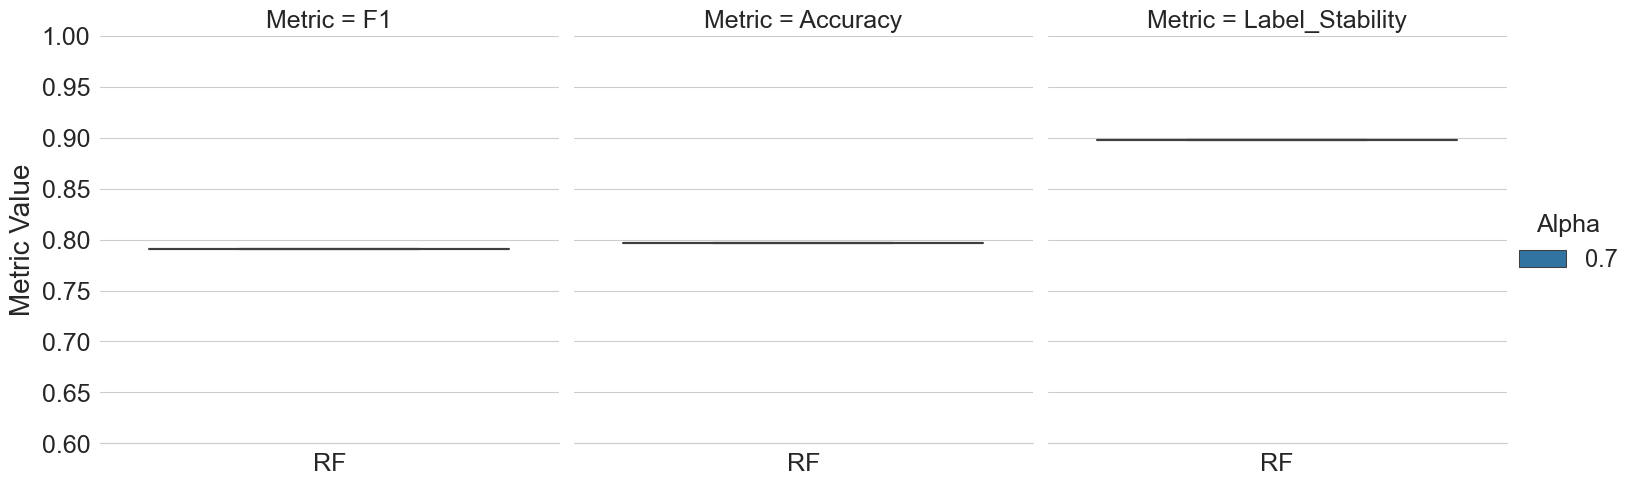

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

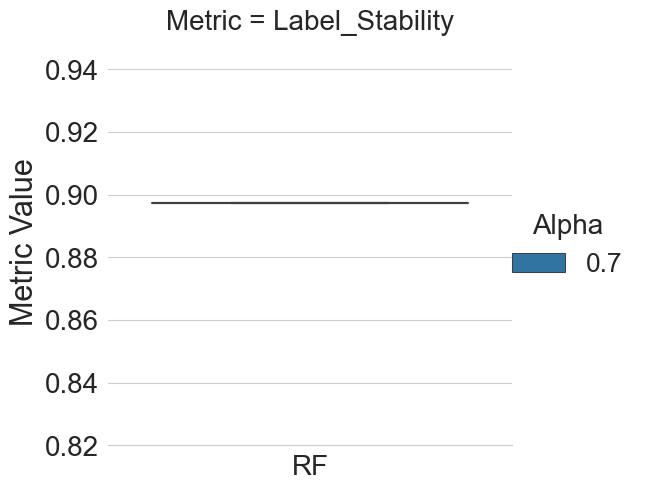

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

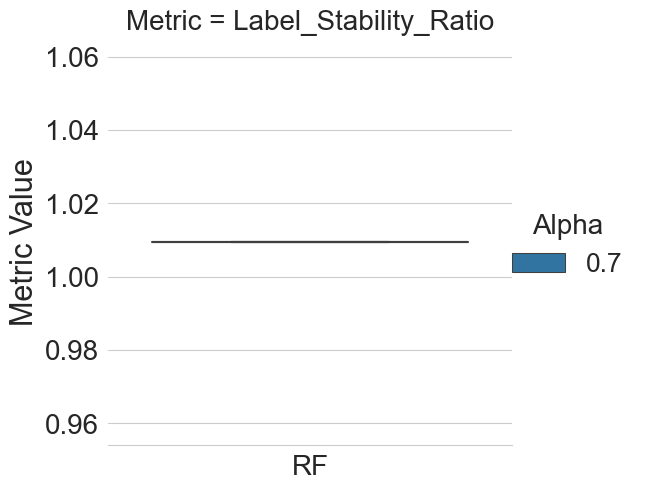

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

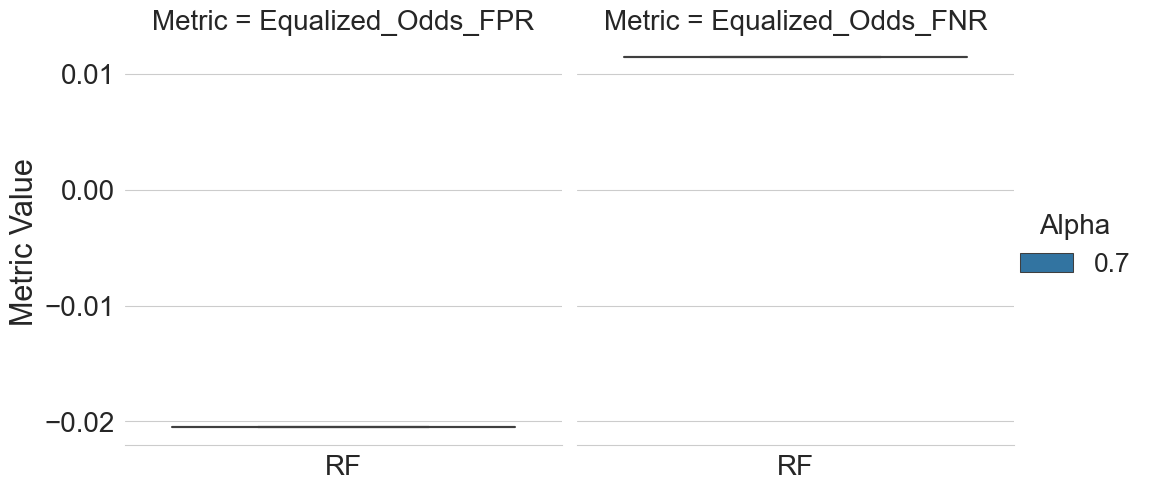

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [21]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Rich set',
    1: 'Poor set',
}

<Figure size 1200x600 with 0 Axes>

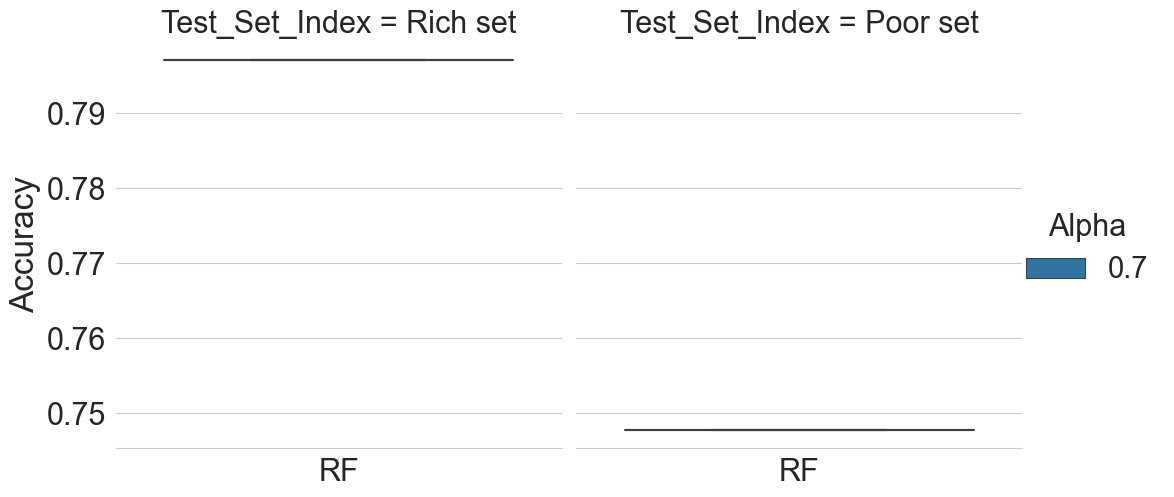

In [22]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

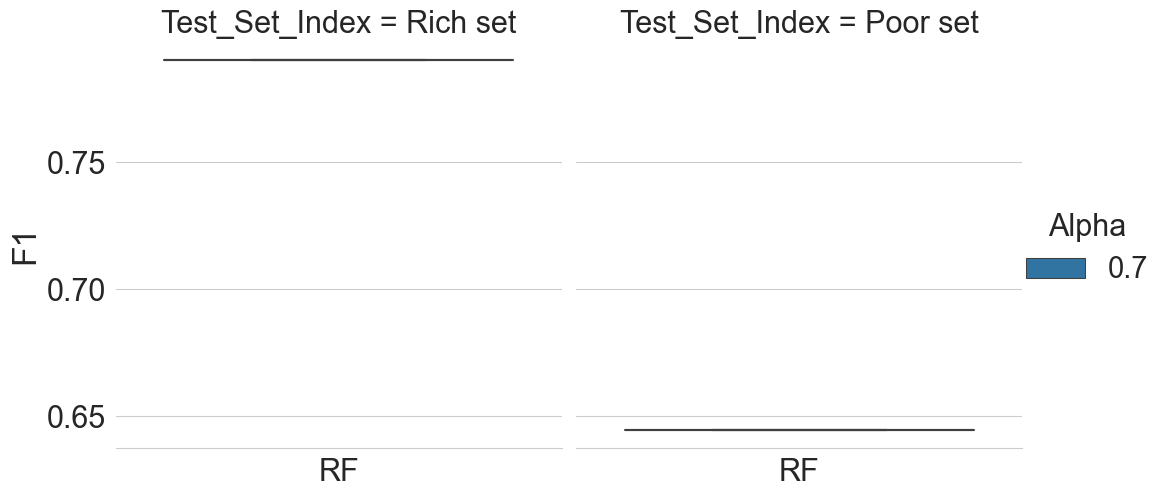

In [23]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

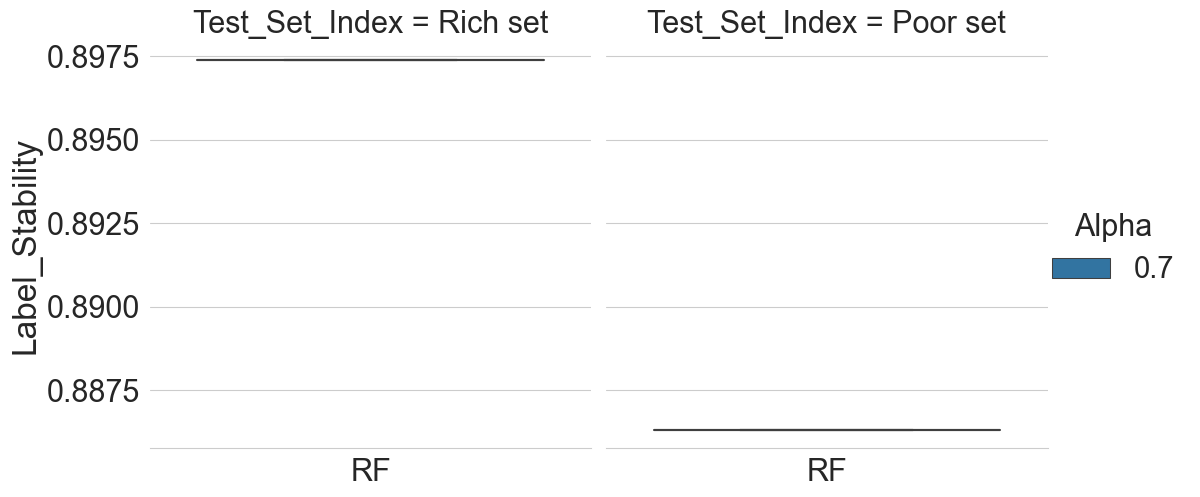

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

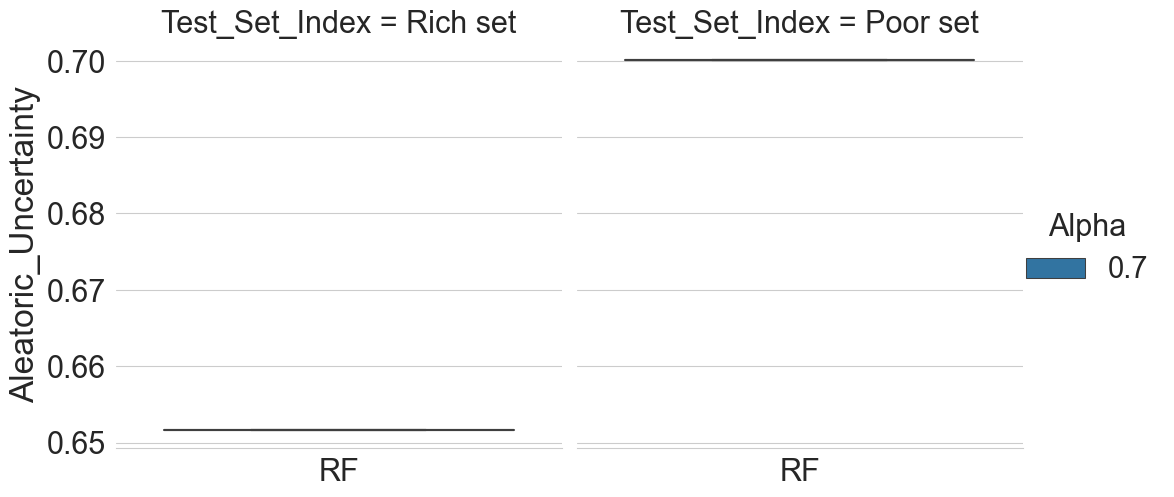

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

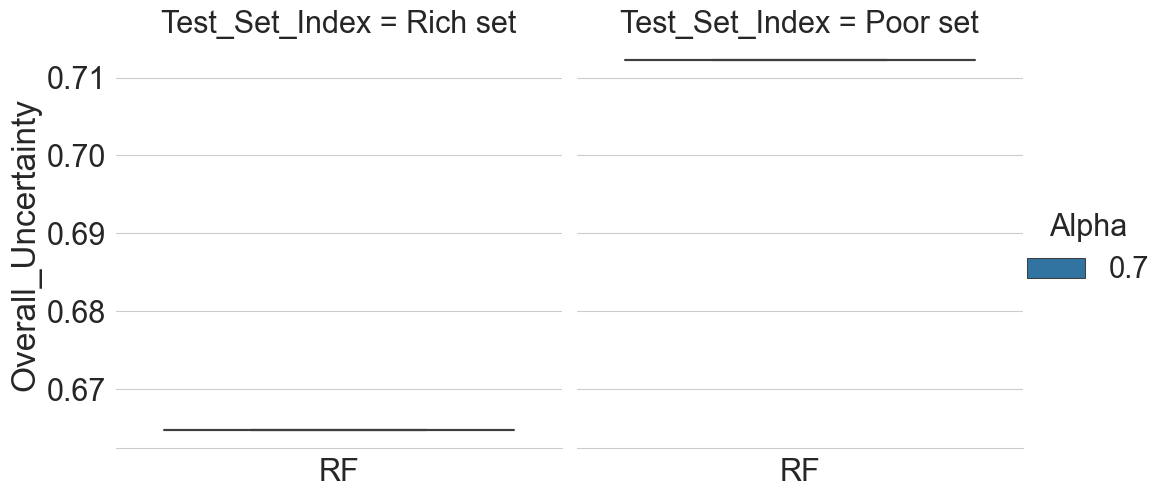

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

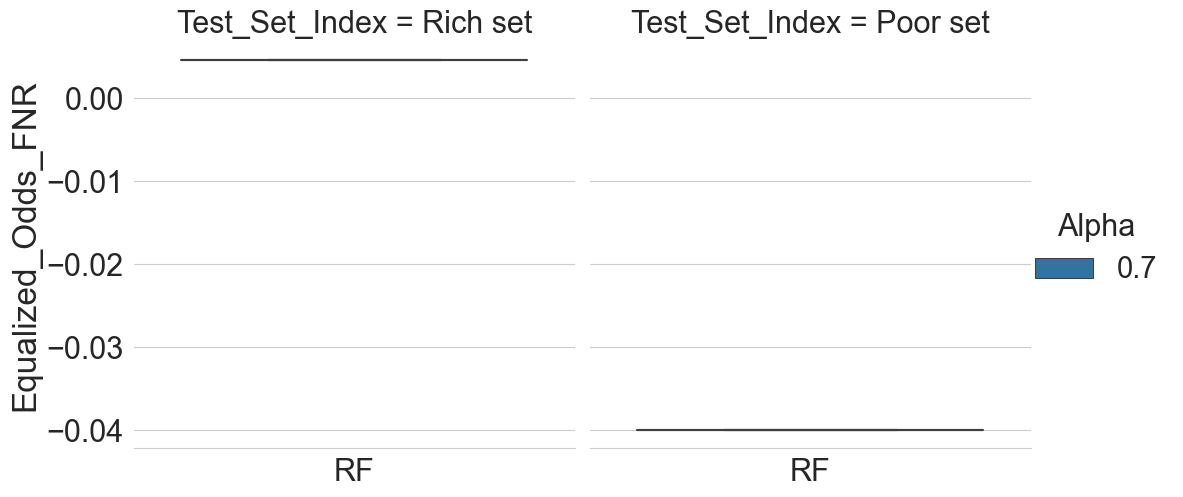

In [27]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

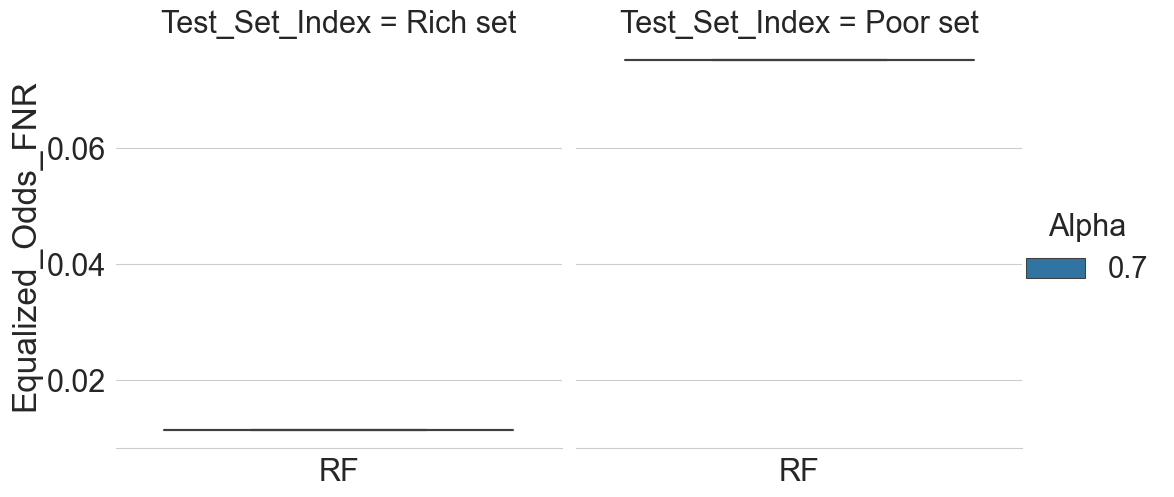

In [28]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

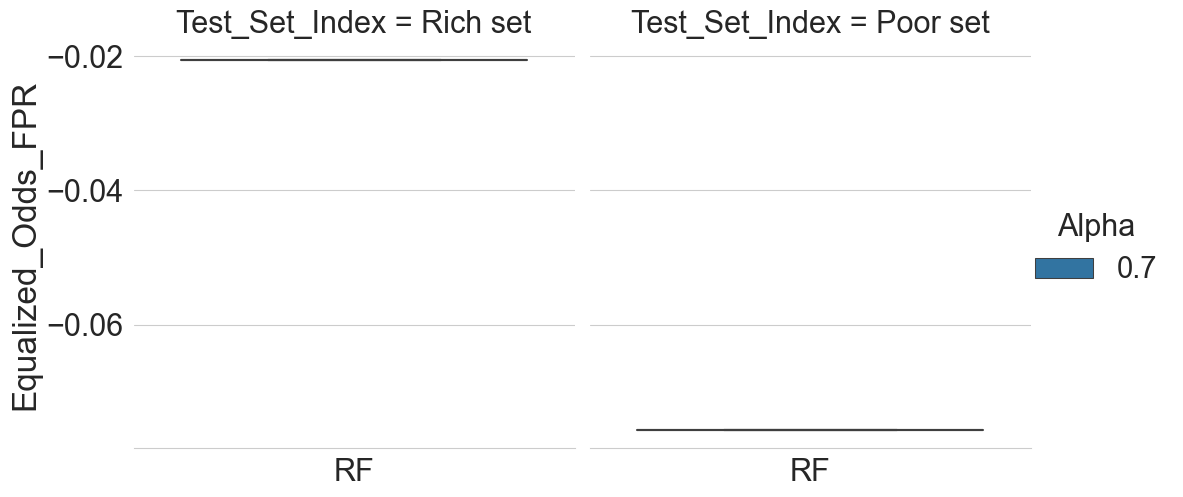

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)